# Principal Component Analysis for predicting salaries for baseball players

In [275]:
import pandas as pd
import numpy as np
import os
from os import path as op
import matplotlib.pyplot as plt
%matplotlib inline

PATH = '/DSEI1030/Applied_Statistics/ISLR/data/'

In [276]:
dataset = op.join(PATH,'Hitters.rda')

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri, r
from rpy2.robjects.packages import importr
 
pandas2ri.activate()

# load your file
robjects.r['load']('Hitters.rda')

# retrieve the matrix that was loaded from the file
matrix = robjects.r['Hitters']

# turn the R matrix into a numpy array
a = np.array(matrix)

print (a)

[[293 66 1 ... 20 nan 'A']
 [315 81 7 ... 10 475.0 'N']
 [479 130 18 ... 14 480.0 'A']
 ...
 [475 126 3 ... 7 385.0 'A']
 [573 144 9 ... 12 960.0 'A']
 [631 170 9 ... 3 1000.0 'A']]


/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [277]:
base = importr('base')
base.load('Hitters.rda');
rdf = base.mget(base.ls())
 
df = {}
for i,f in enumerate(base.names(rdf)):
    df[f] = pandas2ri.ri2py_dataframe(rdf[i])
 
for k,v in df.items():
    print(v.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


In [278]:
df['Hitters'].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [279]:
df = pd.DataFrame(a)
print(df)

      0    1   2    3    4    5   6     7     8    9     10    11    12 13 14  \
0    293   66   1   30   29   14   1   293    66    1    30    29    14  A  E   
1    315   81   7   24   38   39  14  3449   835   69   321   414   375  N  W   
2    479  130  18   66   72   76   3  1624   457   63   224   266   263  A  W   
3    496  141  20   65   78   37  11  5628  1575  225   828   838   354  N  E   
4    321   87  10   39   42   30   2   396   101   12    48    46    33  N  E   
5    594  169   4   74   51   35  11  4408  1133   19   501   336   194  A  W   
6    185   37   1   23    8   21   2   214    42    1    30     9    24  N  E   
7    298   73   0   24   24    7   3   509   108    0    41    37    12  A  W   
8    323   81   6   26   32    8   2   341    86    6    32    34     8  N  W   
9    401   92  17   49   66   65  13  5206  1332  253   784   890   866  A  E   
10   574  159  21  107   75   59  10  4631  1300   90   702   504   488  A  E   
11   202   53   4   31   26 

In [280]:
features =['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns',
           'CRBI','CWalks','League','Division','PutOuts','Assists','Errors','Salary','NewLeague']

indicators=['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns',
           'CRBI','CWalks','PutOuts','Assists','Errors','Salary']

In [281]:
df.columns = features
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [282]:
clean = df.dropna()
print(clean.shape)
clean

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100,A
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


In [283]:
x = df.loc[:, indicators].values
x[:5]
df.loc[:, indicators].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [284]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [285]:
#pca = PCA(n_components=2)

# Separating out the features
df = df.dropna()
x = df.loc[:, indicators].values
# Separating out the Salary
y = df.loc[:,['Salary']].dropna().values
# Standardizing the features
x = StandardScaler().fit_transform(x)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [286]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                 0.076848               1.653525
1                 0.337127              -2.320560
2                 3.408362               0.755757
3                -2.642221              -0.361486
4                 1.071681              -1.511674
5                -4.143347               1.527615
6                -3.661879               0.726483
7                -3.463583              -0.111932
8                 3.958819               2.165361
9                 2.976197              -2.185091
10               -2.004352               1.623108
11               -0.822584              -0.587548
12               -2.245647               1.819037
13               -1.129807               2.578313
14                5.744906               0.222535
15               -3.747562               1.339339
16               -3.288758               2.293288
17               -1.857234              -1.432682
18               -2.291703              -0.925891


In [287]:
finalDf = pd.concat([principalDf.reset_index(), df.reset_index()[['Salary']]], axis = 1).drop('index',axis=1)
print(finalDf)

     principal component 1  principal component 2   Salary
0                 0.076848               1.653525      475
1                 0.337127              -2.320560      480
2                 3.408362               0.755757      500
3                -2.642221              -0.361486     91.5
4                 1.071681              -1.511674      750
5                -4.143347               1.527615       70
6                -3.661879               0.726483      100
7                -3.463583              -0.111932       75
8                 3.958819               2.165361     1100
9                 2.976197              -2.185091  517.143
10               -2.004352               1.623108    512.5
11               -0.822584              -0.587548      550
12               -2.245647               1.819037      700
13               -1.129807               2.578313      240
14                5.744906               0.222535      775
15               -3.747562               1.339339      1

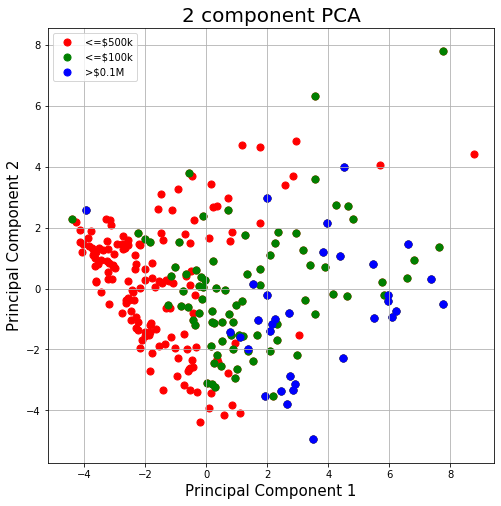

In [298]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
salaries = [0, 500, 1000]
colors = ['r', 'g', 'b']
for salary, color in zip(salaries,colors):
    indicesToKeep = finalDf['Salary'] >= salary
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['<=$500k', '<=$100k', '>$0.1M'])
ax.grid()

In [296]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])